In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
file = 'SouthCalifornia-1982-2011_Physics-of-Data.dat' 
data = np.genfromtxt(file, dtype=None, delimiter=' ')         
header = ["id","id_prv","time","magnitude","x","y", "z"]
df = pd.DataFrame(data)
df.columns = header
df.shape

(110271, 7)

In [4]:
#plt.plot(df["time"], df["magnitude"])
#plt.plot(df["time"], df["x"])
#plt.plot(df["time"], df["y"])
#plt.plot(df["time"], df["z"])
#plt.plot(df["time"], df["id_prv"])


In [5]:
def bins_histogram(data, precision=0.01, len_bin_min=0.1):
    """
    Params
    
    data: 1d numpy array
    precision: desired poisson precision of bins
    """
    N = int(pow(1/precision,2))
    data.sort()
    x = data[::N]
    y = data[1::N]
    if y.shape[0] == x.shape[0]:
        bins = np.concatenate((np.array(data.min()[np.newaxis]),(x[1:] + y[1:])/2, np.array(data.max()[np.newaxis])))
    else:
        bins = np.concatenate((np.array(data.min()[np.newaxis]),(x[1:-1] + y[1:])/2, np.array(data.max()[np.newaxis])))
    return bins

In [6]:
data.shape

(110271,)

In [7]:
data = np.array(df["time"])
data.sort()
diff_data = data[1:] - data[:-1]
print(diff_data.min())
bins = bins_histogram(diff_data, 0.01)
print(bins)
print(data)


0.0
[0.00000000e+00 8.43523200e+01 2.42611200e+02 5.27381280e+02
 1.06130736e+03 1.97107344e+03 3.40924464e+03 5.58512496e+03
 8.89703136e+03 1.43241610e+04 2.48592586e+04 1.02617029e+05
 1.07345769e+06]
[0.00000000e+00 3.65013907e+04 3.74882774e+04 ... 9.30531796e+08
 9.30536269e+08 9.30566736e+08]


In [8]:


data1 = np.log(data)
bins1 = np.log(bins)

/home/nicola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nicola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


(array([9.6308e+04, 9.3780e+03, 2.8730e+03, 1.0070e+03, 4.0500e+02,
        1.5100e+02, 7.7000e+01, 3.5000e+01, 2.1000e+01, 6.0000e+00]),
 array([     0.        ,  19908.726912  ,  39817.453824  ,  59726.18073599,
         79634.90764799,  99543.63455999, 119452.36147199, 139361.08838398,
        159269.81529598, 179178.54220798, 199087.26911998]),
 <a list of 10 Patch objects>)

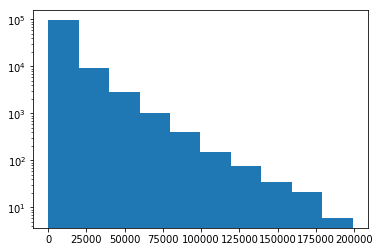

In [9]:
data = np.array(df["time"])
data.sort()
diff_data = data[1:]-data[:-1]
plt.hist(diff_data[diff_data<200000], log=True)

In [10]:
def select_bin_number(x, min_nbin = 7, fraction = 0.001):
    n_min = fraction*len(x)

    n, bin_extremes, _ = plt.hist(x, bins = min_nbin )
    plt.close()
    last_n = n[-1]

    if last_n > n_min:
        return min_nbin, bin_extremes
    else:
        i = min_nbin
        nbin = min_nbin
        while last_n < n_min and nbin < 100:
            nbin = nbin + 1
            #print('Attempt with nbin = {} \n'.format(nbin))
            n, _, _ = plt.hist(x, bins = nbin )
            plt.close()
            #print(n[i-1:])
            last_n = n[i-1:].sum()
            #print('Last n: ', last_n)
            #print('All n : ', n.sum())

        n, bin_extremes, _ = plt.hist(x, bins = nbin )
        plt.close()
        bins = np.concatenate((bin_extremes[:min_nbin],bin_extremes[-1:]))
        return nbin, bins 

In [12]:
filtered =df[df["magnitude"]>3]
times = np.array(filtered["time"])
min_nbin = 7
fraction = 0.001
n_bin = fraction*len(diff_data)
n, bin_extremes, _ = plt.hist(x, bins = min_nbin)


NameError: name 'x' is not defined

In [ ]:
ev = {'1':{'2':{'6','7'},'3'}} 
for key in ev:
    for key2 in ev[key]:
        

In [13]:
def evees(df, index=-1):
    dataset = {}
    df_filtered = df[df["id_prv"]==index]
    lenght =  df_filtered.shape[0]
    for i in range(lenght):
        event = df_filtered.iloc[i]
        dataset[str(event["id"])] = {"event" : event}
        dataset[str(event["id"])]["cilds"] = evees(df, index=int(event["id"]))
    return dataset



In [14]:
depths = []
j = 0
def evees_light(df, index=-1, depth=0):
    global j
    j += 1
    dataset = {}
    df_filtered = df[df["id_prv"]==index]
    lenght =  df_filtered.shape[0]
    if lenght == 0:
        depths.append(depth)
    for i in range(lenght):
        event = df_filtered.iloc[i]
        #dataset[str(event["id"])] = {"event" : event}
        dataset[str(event["id"])] = {"depth" : depth}
        dataset[str(event["id"])]["cilds"] = evees_light(df, index=int(event["id"]), depth = depth + 1)
    return dataset